In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_airp = pd.read_csv('AirPassengers.csv')

In [3]:
df_airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_airp.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df_airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df_airp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
from pandas.tseries.offsets import MonthEnd
df_airp['Month'] = pd.to_datetime(df_airp['Month'],format="%Y-%m") + MonthEnd(1)

In [8]:
df_airp.head()

,Month,#Passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [9]:
df_airp.set_index(['Month'],inplace=True)

In [10]:
df_airp.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [12]:
df_airp.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


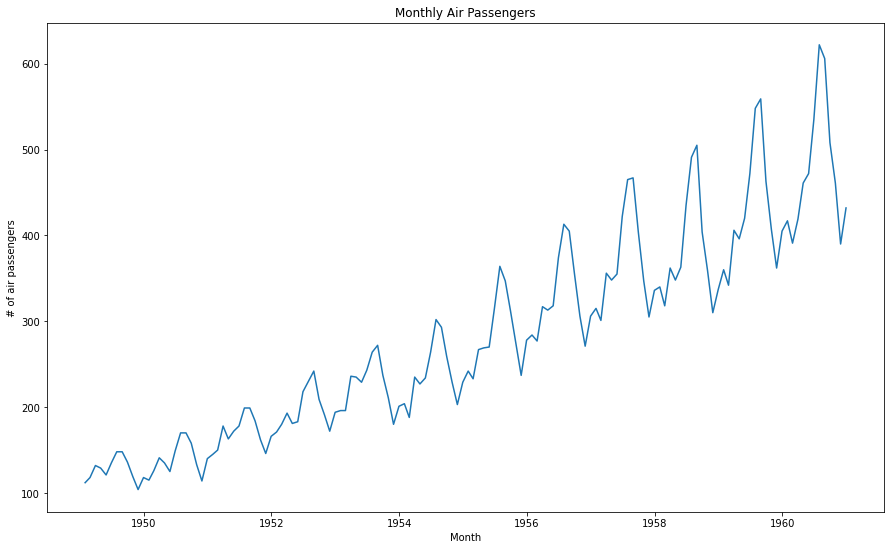

In [13]:
plt.figure(figsize=(15,9))
plt.plot(df_airp['#Passengers'])
plt.xlabel('Month')
plt.ylabel('# of air passengers')
plt.title("Monthly Air Passengers")
plt.show()

In [23]:
ts_rolling_mean = df_airp['#Passengers'].rolling(12).mean()
ts_rolling_std = df_airp['#Passengers'].rolling(12).std()

In [24]:
df_airp['#Passengers'].mean()

280.2986111111111

In [25]:
ts_rolling_mean[0:15]

Month
1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
1949-06-30           NaN
1949-07-31           NaN
1949-08-31           NaN
1949-09-30           NaN
1949-10-31           NaN
1949-11-30           NaN
1949-12-31    126.666667
1950-01-31    126.916667
1950-02-28    127.583333
1950-03-31    128.333333
Name: #Passengers, dtype: float64

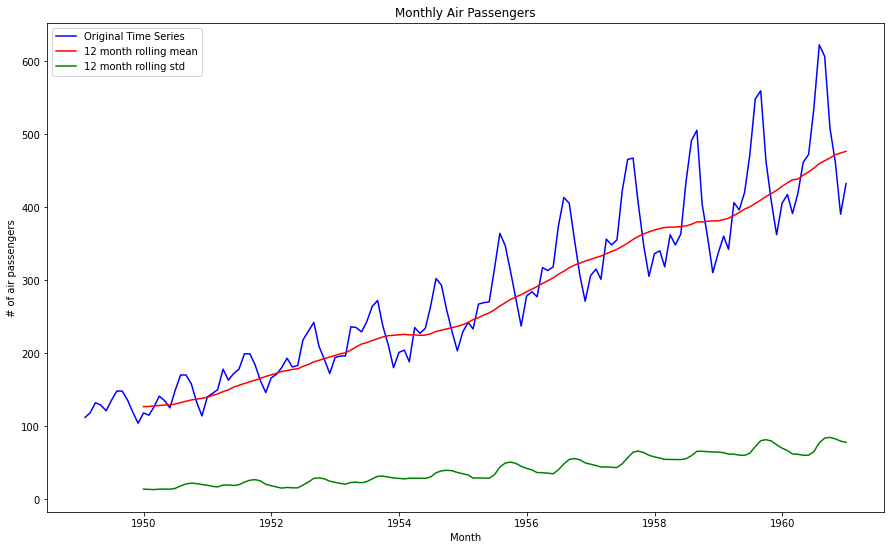

In [26]:
plt.figure(figsize=(15,9))
plt.plot(df_airp['#Passengers'], color='blue', label='Original Time Series')
plt.plot(ts_rolling_mean, color='red',label='12 month rolling mean')
plt.plot(ts_rolling_std, color='green',label='12 month rolling std')
plt.xlabel('Month')
plt.ylabel('# of air passengers')
plt.title("Monthly Air Passengers")
plt.legend(loc='best')
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adf_test = adfuller(df_airp['#Passengers'])

In [29]:
adf_test

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [30]:
print(f"Test Statistic {adf_test[0]}")
print(f"p-value {adf_test[1]}")
print(f"#Lags Used {adf_test[2]}")
print(f"Number of observations {adf_test[3]}")

Test Statistic 0.815368879206047
p-value 0.991880243437641
#Lags Used 13
Number of observations 130


In [31]:
df_airp['#Passengers'][0:5]

Month
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
Name: #Passengers, dtype: int64

In [49]:
df_airp.tail(10)

,#Passengers
Month,
1960-03-31,419
1960-04-30,461
1960-05-31,472
1960-06-30,535
1960-07-31,622
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [53]:
df_airp1 = df_airp.copy()

df_airp1['P-1'] =  df_airp['#Passengers'].shift(1)
df_airp1['P-2'] =  df_airp['#Passengers'].shift(2)

In [55]:
df_airp1.tail()

,#Passengers,P-1,P-2
Month,,,
1960-08-31,606,622.0,535.0
1960-09-30,508,606.0,622.0
1960-10-31,461,508.0,606.0
1960-11-30,390,461.0,508.0
1960-12-31,432,390.0,461.0


In [36]:
df_airp['#Passengers'].shift(1)[0:8]

Month
1949-01-31      NaN
1949-02-28    112.0
1949-03-31    118.0
1949-04-30    132.0
1949-05-31    129.0
1949-06-30    121.0
1949-07-31    135.0
1949-08-31    148.0
Name: #Passengers, dtype: float64

In [37]:
nshifts = 1
ts_airp = df_airp['#Passengers'] - df_airp['#Passengers'].shift(nshifts)

In [38]:
ts_airp[0:5]

Month
1949-01-31     NaN
1949-02-28     6.0
1949-03-31    14.0
1949-04-30    -3.0
1949-05-31    -8.0
Name: #Passengers, dtype: float64

In [39]:
adfuller(ts_airp[nshifts:])[1]

0.054213290283824704

In [41]:
nshifts = 2
ts_airp = df_airp['#Passengers'] - df_airp['#Passengers'].shift(nshifts)
adfuller(ts_airp[nshifts:])[1]

0.03862975767698862

In [42]:
ts_airp

Month
1949-01-31      NaN
1949-02-28      NaN
1949-03-31     20.0
1949-04-30     11.0
1949-05-31    -11.0
              ...  
1960-08-31     71.0
1960-09-30   -114.0
1960-10-31   -145.0
1960-11-30   -118.0
1960-12-31    -29.0
Name: #Passengers, Length: 144, dtype: float64

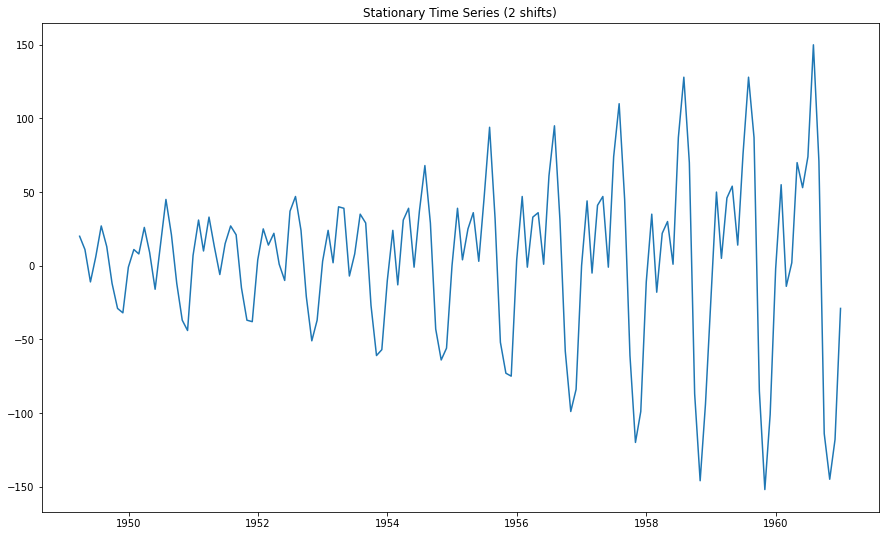

In [43]:
plt.figure(figsize = (15,9))
plt.plot(ts_airp)
plt.title("Stationary Time Series (2 shifts)")
plt.show()

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
decomp_airp = seasonal_decompose(df_airp['#Passengers'])

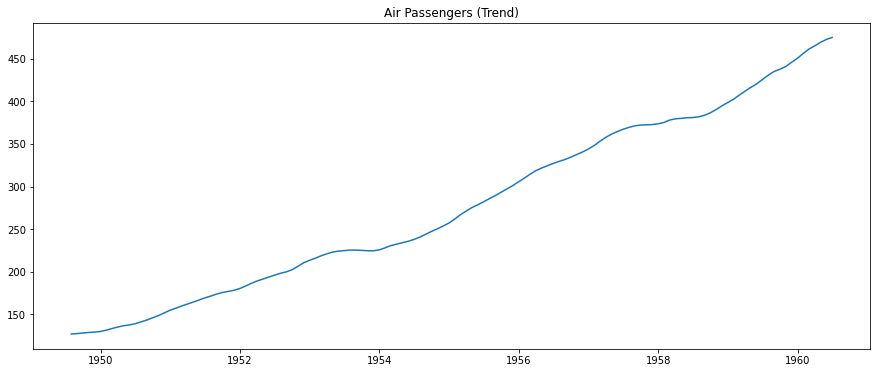

In [46]:
plt.figure(figsize = (15,6))
plt.plot(decomp_airp.trend)
plt.title('Air Passengers (Trend)')
plt.show()

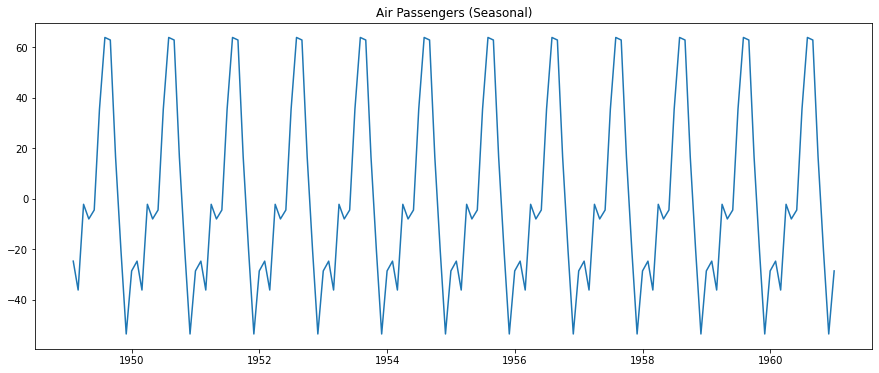

In [47]:
plt.figure(figsize = (15,6))
plt.plot(decomp_airp.seasonal)
plt.title('Air Passengers (Seasonal)')
plt.show()

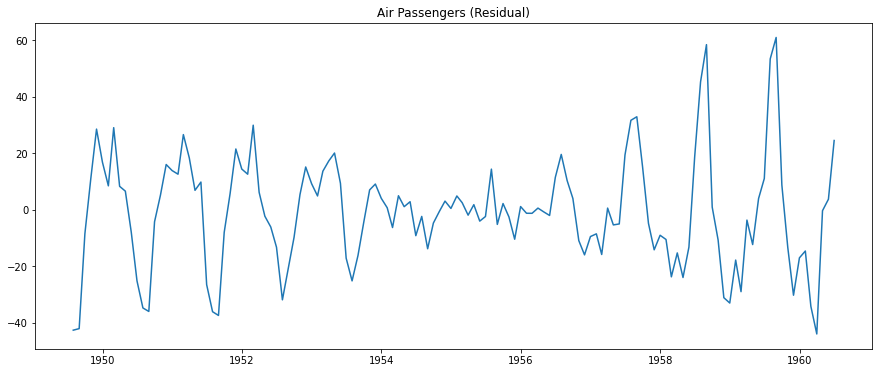

In [48]:
plt.figure(figsize = (15,6))
plt.plot(decomp_airp.resid)
plt.title('Air Passengers (Residual)')
plt.show()

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

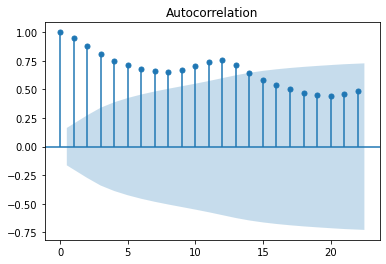

In [59]:
plot_acf(df_airp['#Passengers'])
plt.show()

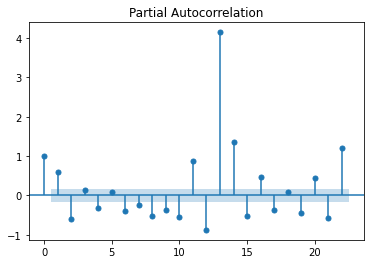

In [60]:
plot_pacf(ts_airp[nshifts:],)
plt.show()

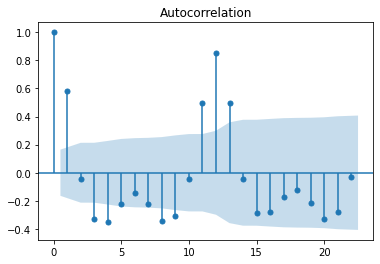

In [61]:
plot_acf(ts_airp[nshifts:])
plt.show()

In [ ]:
#ARIMA(p=2, d=2, q=2)

In [ ]:
df_airp.head(12)

In [62]:
df_airp_train = df_airp[df_airp.index < pd.to_datetime('1960-01-31')]
df_airp_test = df_airp[df_airp.index >= pd.to_datetime('1960-01-31')]

In [63]:
df_airp_train.shape

(132, 1)

In [64]:
df_airp_test.shape

(12, 1)

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model_airp = ARIMA(df_airp_train['#Passengers'],order = [2,2,2], freq='M')
result=model_airp.fit()

In [79]:
result.aic

1256.989635239643

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  130
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -622.495
Method:                       css-mle   S.D. of innovations             28.494
Date:                Fri, 22 Oct 2021   AIC                           1256.990
Time:                        17:22:57   BIC                           1274.195
Sample:                    03-31-1949   HQIC                          1263.981
                         - 12-31-1959                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041      0.091      0.045      0.964      -0.174       0.183
ar.L1.D2.#Passengers    -0.5058      0.097     -5.189      0.000      -0.697      -0.315
ar.L2.D2.#Passengers     0.1090      0.094      1.159      0.246      -0.075       0.293
ma.L1.D2.#Passengers    -0.0557      0.046     -1.215      0.224      -0.146       0.034
ma.L2.D2.#Passengers    -0.9443      0.045    -20.788      0.000      -1.033      -0.855
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4953           +0.0000j            1.4953            0.5000
AR.2            6.1363           +0.0000j            6.1363            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0590           +0.0000j            1.0590            0.5000
-----------------------------------------------------------------------------
"""

In [71]:
pred_val = result.forecast(12)[0] 

In [72]:
pred_val

array([436.48898102, 428.46060428, 439.17054374, 436.10199375,
       442.05014455, 441.941881  , 445.88515968, 447.12487263,
       450.17920864, 452.02676969, 454.68812194, 456.81202395])

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mean_squared_error(y_pred = pred_val, y_true=df_airp_test['#Passengers'].values, squared=False)

80.0251948170633

In [75]:
from sklearn.metrics import mean_absolute_percentage_error

In [76]:
mean_absolute_percentage_error(y_pred = pred_val, y_true=df_airp_test['#Passengers'].values)

0.11533213616010084

In [77]:
1-mean_absolute_percentage_error(y_pred = pred_val, y_true=df_airp_test['#Passengers'].values)

0.8846678638398991

In [ ]:
# AUTOARIMA -> Build models by automatically detecting the p,d,q values
# pmdarima

In [ ]:
for p in range(0m5):
    for q in range(0,5):
        for d in range(1,2):
            model1 = ARIMA(df_airp_train['#Passengers'],order = [p,d,q], freq='M')